In [60]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [61]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [62]:
X_train.shape

(60000, 28, 28)

In [63]:

X_test.shape


(10000, 28, 28)

In [64]:
single_image= X_train[0]

In [65]:

single_image.shape


(28, 28)

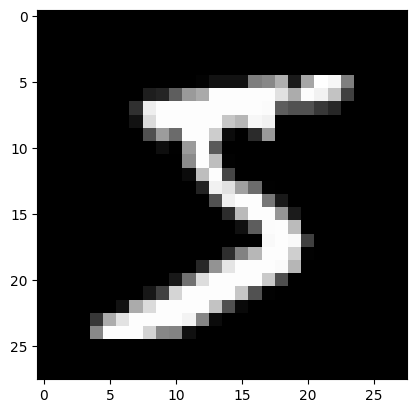

In [66]:

plt.imshow(single_image,cmap='gray')

In [67]:
y_train.shape


(60000,)

In [68]:

X_train.min()

0

In [69]:

X_train.max()

255

In [70]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [71]:

X_train_scaled.min()

0.0

In [72]:
X_train_scaled.max()

1.0

In [73]:
y_train[0]

5

In [74]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [75]:
type(y_train_onehot)

numpy.ndarray

In [76]:
y_train_onehot.shape

(60000, 10)

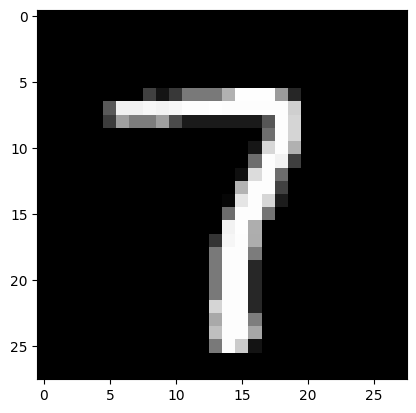

In [89]:
single_image = X_train[44500]
plt.imshow(single_image,cmap='gray')


In [78]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [79]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [80]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(7,7), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3872)              0         
                                                                 
 dense_12 (Dense)            (None, 32)                123936    
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                      

In [81]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [82]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 32s 32ms/step - loss: 0.3821 - accuracy: 0.8772 - val_loss: 0.1071 - val_accuracy: 0.9672
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0996 - accuracy: 0.9720 - val_loss: 0.0752 - val_accuracy: 0.9775
Epoch 3/5
938/938 [==============================] - 30s 31ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0690 - val_accuracy: 0.9778
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0535 - val_accuracy: 0.9839
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0404 - accuracy: 0.9877 - val_loss: 0.0458 - val_accuracy: 0.9859


In [83]:
metrics = pd.DataFrame(model.history.history)

In [84]:

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.382141,0.877167,0.107062,0.9672
1,0.099557,0.972017,0.075242,0.9775
2,0.067069,0.980183,0.069019,0.9778
3,0.050235,0.984950,0.053478,0.9839
4,0.040435,0.987733,0.045804,0.9859


<Axes: >

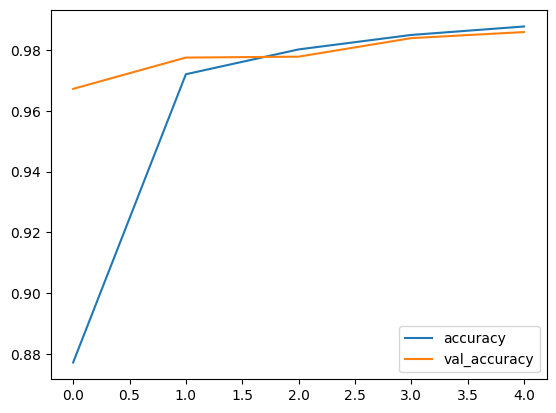

In [85]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

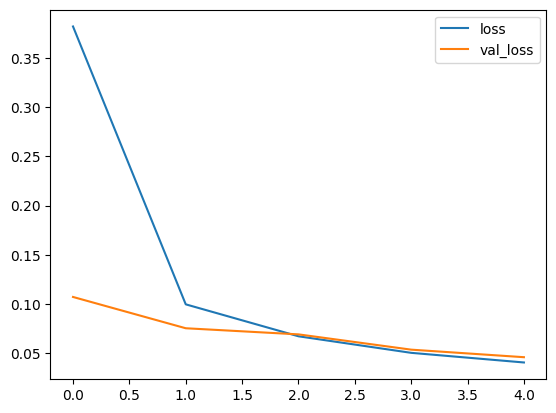

In [86]:
metrics[['loss','val_loss']].plot()

In [87]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [88]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 974    1    3    0    0    0    1    0    1    0]
 [   0 1126    2    2    1    0    2    0    2    0]
 [   2    0 1024    1    3    0    0    1    0    1]
 [   0    0    2 1003    0    2    0    0    2    1]
 [   0    0    3    0  973    0    1    0    0    5]
 [   2    0    0    9    0  876    2    0    1    2]
 [   5    2    4    0    4    2  940    0    1    0]
 [   0    2   12    2    0    1    0 1005    2    4]
 [   4    0    5    3    3    0    2    1  953    3]
 [   2    1    2    3    5    4    0    1    6  985]]


In [90]:
img = image.load_img('seven.png')

In [91]:

type(img)

PIL.Image.Image

In [92]:
img = image.load_img('seven.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [93]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 33ms/step


In [94]:
print(x_single_prediction)


[7]


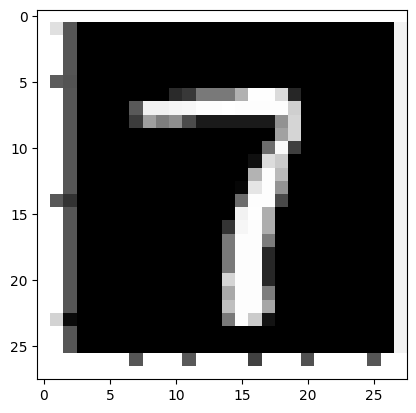

In [95]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [98]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [99]:
print(x_single_prediction)

[7]
